In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')


In [3]:
from google.colab import files


uploaded = files.upload()

Saving SaleData.xlsx to SaleData.xlsx


In [4]:
#loading data into data frame
df=pd.read_excel("SaleData.xlsx")

In [5]:
print(df.head())  # displaying first 5 rows of data

   OrderDate   Region  Manager   SalesMan          Item  Units  Unit_price  \
0 2018-01-06     East   Martha  Alexander    Television   95.0      1198.0   
1 2018-01-23  Central  Hermann     Shelli  Home Theater   50.0       500.0   
2 2018-02-09  Central  Hermann       Luis    Television   36.0      1198.0   
3 2018-02-26  Central  Timothy      David    Cell Phone   27.0       225.0   
4 2018-03-15     West  Timothy    Stephen    Television   56.0      1198.0   

   Sale_amt  
0  113810.0  
1   25000.0  
2   43128.0  
3    6075.0  
4   67088.0  


In [6]:
print(df.tail())

    OrderDate   Region  Manager SalesMan          Item   Units  Unit_price  \
40 2019-11-17  Central  Hermann     Luis  Home Theater   11.00     500.000   
41 2019-12-04  Central  Hermann     Luis  Home Theater   94.00     500.000   
42 2019-12-21  Central   Martha   Steven  Home Theater   28.00     500.000   
43        NaT      NaN      NaN      NaN           NaN  278.00    1125.000   
44        NaT      NaN      NaN      NaN           NaN   34.75     140.625   

    Sale_amt  
40   5500.00  
41  47000.00  
42  14000.00  
43  62550.00  
44   7818.75  


In [7]:
df.shape #identifies rows and columns in dataset

(45, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   OrderDate   43 non-null     datetime64[ns]
 1   Region      43 non-null     object        
 2   Manager     43 non-null     object        
 3   SalesMan    43 non-null     object        
 4   Item        43 non-null     object        
 5   Units       45 non-null     float64       
 6   Unit_price  45 non-null     float64       
 7   Sale_amt    45 non-null     float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 2.9+ KB


In [9]:
df.describe()

,OrderDate,Units,Unit_price,Sale_amt
count,43,45.000000,45.000000,45.000000
mean,2018-12-29 00:00:00,54.083333,583.313889,30578.761111
min,2018-01-06 00:00:00,2.000000,58.500000,250.000000
25%,2018-07-03 12:00:00,28.000000,225.000000,4329.000000
50%,2018-12-29 00:00:00,53.000000,500.000000,17100.000000
75%,2019-06-25 12:00:00,75.000000,1198.000000,43128.000000
max,2019-12-21 00:00:00,278.000000,1198.000000,113810.000000
std,NaN,45.096676,444.806622,32227.534943


In [10]:
#column to list
df.columns.tolist()


['OrderDate',
 'Region',
 'Manager',
 'SalesMan',
 'Item',
 'Units',
 'Unit_price',
 'Sale_amt']

In [11]:
df.isnull().sum() #checking for missing values

,0
OrderDate,2
Region,2
Manager,2
SalesMan,2
Item,2
Units,0
Unit_price,0
Sale_amt,0


In [12]:
df.nunique()

,0
OrderDate,43
Region,3
Manager,4
SalesMan,11
Item,5
Units,39
Unit_price,7
Sale_amt,42


In [13]:
#UNIVARIATE ANALYSIS

df.dtypes

,0
OrderDate,datetime64[ns]
Region,object
Manager,object
SalesMan,object
Item,object
Units,float64
Unit_price,float64
Sale_amt,float64


In [14]:
df.dtypes[df.dtypes=='float64']

,0
Units,float64
Unit_price,float64
Sale_amt,float64


In [15]:
df.dtypes[df.dtypes=='object']

,0
Region,object
Manager,object
SalesMan,object
Item,object


In [16]:
df['Units'] = df['Units'].astype('object')

In [17]:
df['Unit_price'] = df['Unit_price'].astype('object')

In [18]:
df['Sale_amt'] = df['Sale_amt'].astype('object')

In [19]:
df[['Units','Unit_price','Sale_amt']].dtypes

,0
Units,object
Unit_price,object
Sale_amt,object


In [20]:
# As these 4 columns are of object datatype, pandas wont be able to recognise it
df[['Region','Manager','SalesMan','Item']].head(8)

,Region,Manager,SalesMan,Item
0,East,Martha,Alexander,Television
1,Central,Hermann,Shelli,Home Theater
2,Central,Hermann,Luis,Television
3,Central,Timothy,David,Cell Phone
4,West,Timothy,Stephen,Television
5,East,Martha,Alexander,Home Theater
6,Central,Martha,Steven,Television
7,Central,Hermann,Luis,Television


In [21]:
date = pd.DatetimeIndex(df['OrderDate'])      # creating an instance(date) of DatetimeIndex class using "OrderDate"

In [22]:
# extracting new columns from "OrderDate"

# last day of year when order was done
df['doy_OD'] = date.dayofyear

# month of year when order was done
df['moy_OD'] = date.month

# day of week order was done
df['dow_OD'] = date.dayofweek

In [23]:
df[['OrderDate','doy_OD','moy_OD','dow_OD']].head()

,OrderDate,doy_OD,moy_OD,dow_OD
0,2018-01-06,6.0,1.0,5.0
1,2018-01-23,23.0,1.0,1.0
2,2018-02-09,40.0,2.0,4.0
3,2018-02-26,57.0,2.0,0.0
4,2018-03-15,74.0,3.0,3.0


In [24]:
#making groups of columns
People_details=['Manager','SalesMan']
Order_details=['Region','Item','Units','Unit_price','Sale_amt']
Order_timings=['Orderdate','moy_OD','dow_OD','doy_OD']


In [25]:
def UVA_numeric(df,var_group):
   size=len(var_group)
   plt.figure(figsize=(7*size,3),dpi=100)  # size() function count the number of elements along a given axis.
                                           # DPI stands for dots per inch. The higher the value of DPI higher the resolution.
   for j,i in enumerate(var_group):        # calculating descriptives of variable
      mini=df[i].min()
      maxi=df[i].max()
      ran=df[i].max()-df[i].min()
      mean = df[i].mean()
      median = df[i].median()
      st_dev = df[i].std()
      kurt = df[i].kurtosis()

      points = mean-st_dev, mean+st_dev    # calculating points of standard deviation

      plt.subplot(1,size+1,j+1)            # Plotting the variable with every information
      sns.kdeplot(df[i],shade='True')
      sns.lineplot(points,[0,0],color='Black',label="Std_dev")
      sns.scatterplot([mini,maxi],[0,0],color='Orange',label="min/max")
      sns.scatterplot([mean], [0], color = 'red', label = "mean")
      sns.scatterplot([median], [0], color = 'blue', label = "median")
      plt.xlabel('{}'.format(i), fontsize = 20)
      plt.ylabel('density')
      plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2),round(kurt,2),round(skew,2),(round(mini,2),round(maxi,2),round(ran,2)),round(mean,2),round(median,2))))



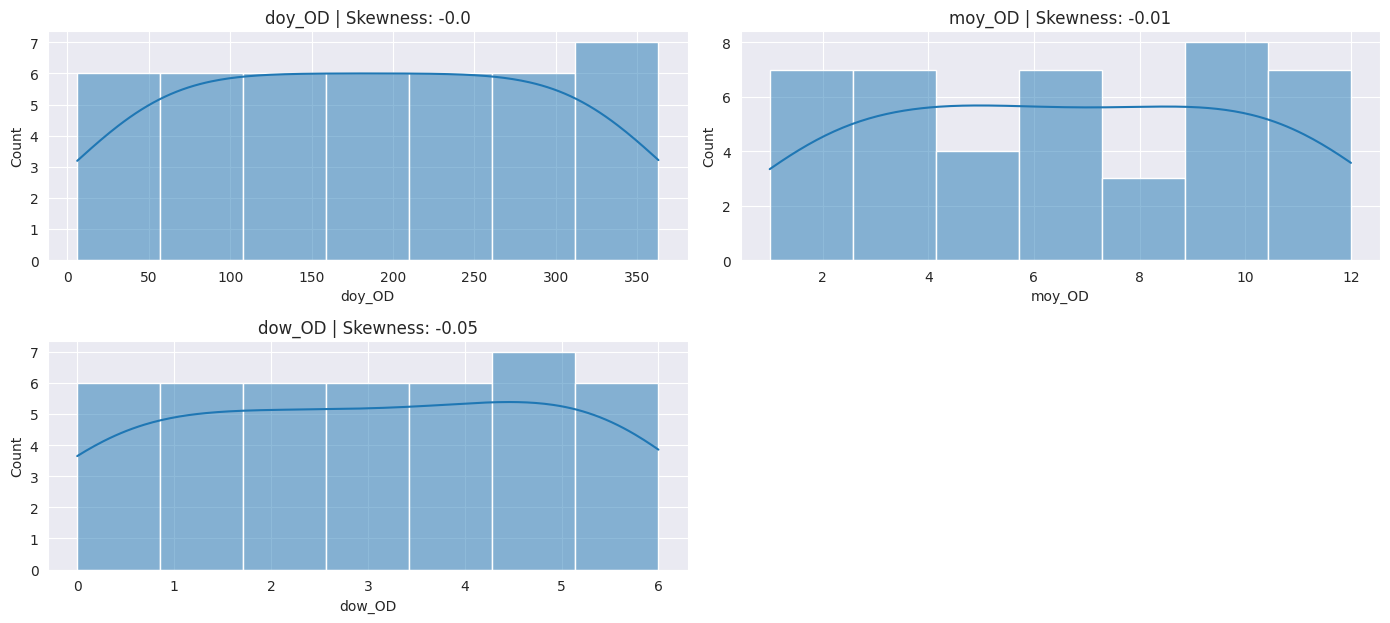

In [26]:
# Set Seaborn style
sns.set_style("darkgrid")

# Identify numerical columns
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

# Adjust layout and show plots
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

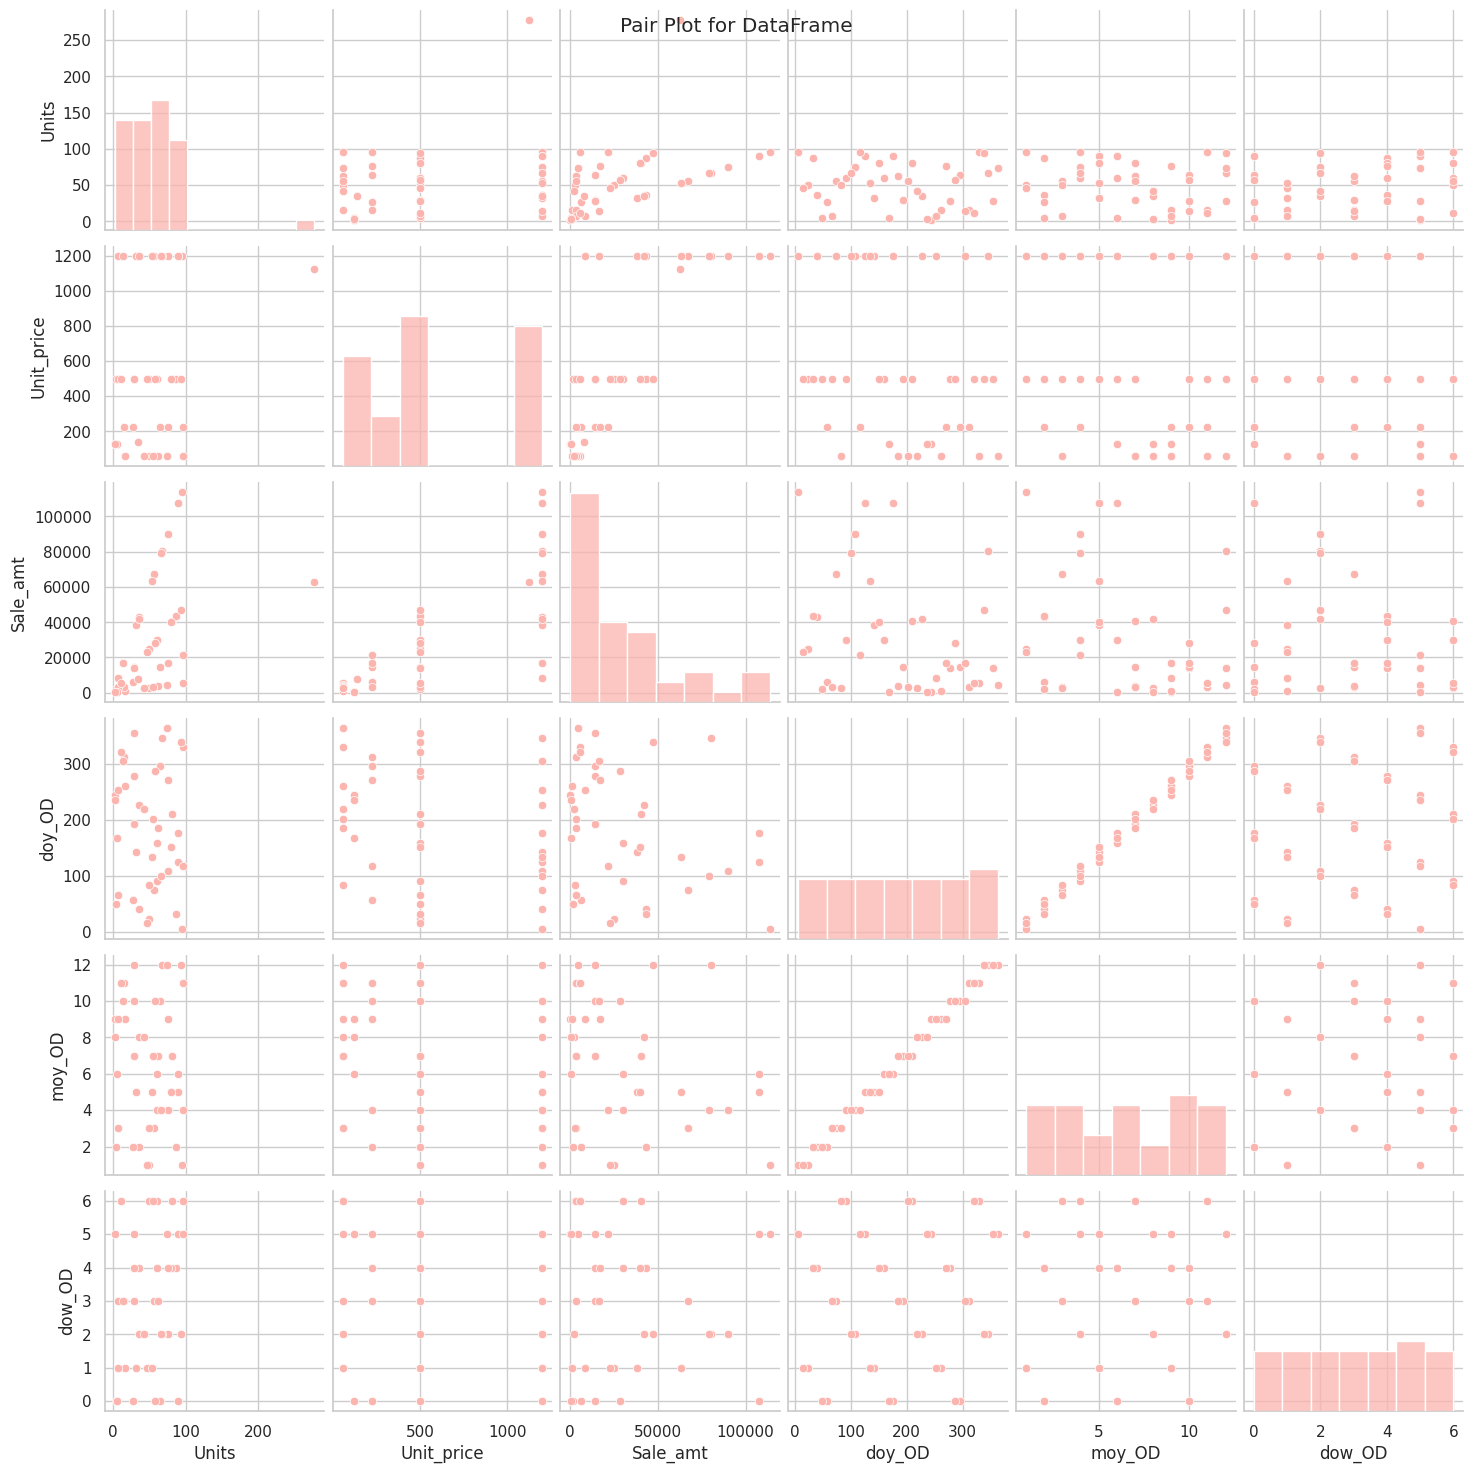

In [39]:
#BIVARIATE ANALYSIS


#pair plot- a matrix of graphs that enables the visualization of the relationship between each pair of variables in a dataset
# Set the color palette
sns.set_palette("Pastel1")

# Assuming 'df' is your DataFrame
plt.figure(figsize=(10, 6))

# Using Seaborn to create a pair plot with the specified color palette
sns.pairplot(df)

plt.suptitle('Pair Plot for DataFrame')
plt.show()


#If the plot is diagonal , histograms of kernel density plots , is shows the distribution of the individual variables.
#If the scatter plot is in the lower triangle, it displays the relationship between the pairs of the variables.
#If the scatter plots above and below the diagonal are mirror images, indicating symmetry.
#If the histogram plots are more centered, it represents the locations of peaks.
#Skewness is depicted by observing whether the histogram is symmetrical or skewed to the left or right.


<Axes: xlabel='OrderDate', ylabel='Region'>

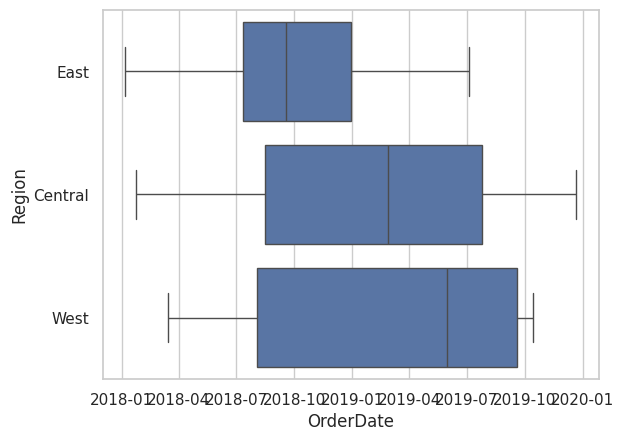

In [33]:
#Box Plot-  shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable.

#plotting box plot between OrderDate and Region
sns.boxplot(x='OrderDate', y='Region', data=df)

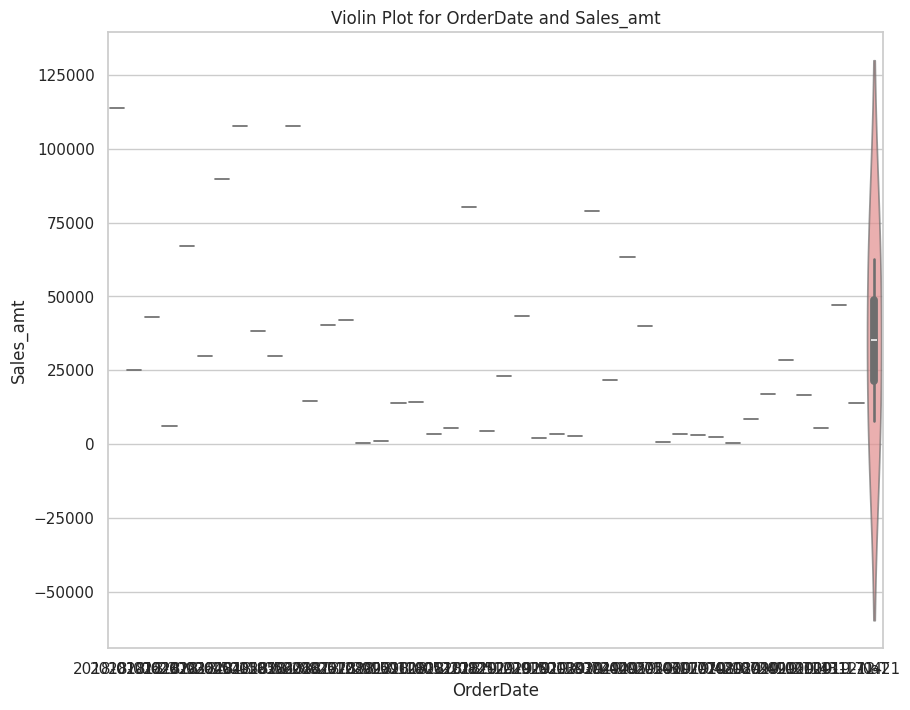

In [36]:
#Violin Plot- shows the distribution of data points after grouping by one (or more) variables. Unlike a box plot, each violin is drawn using a kernel density

df['OrderDate'] = df['OrderDate'].astype(str)  # Convert to categorical

plt.figure(figsize=(10, 8))

# Using Seaborn to create a violin plot
sns.violinplot(x="OrderDate", y="Sale_amt", data=df, palette={'lightcoral'}, alpha=0.7)

plt.title('Violin Plot for OrderDate and Sales_amt')
plt.xlabel('OrderDate')
plt.ylabel('Sales_amt')
plt.show()

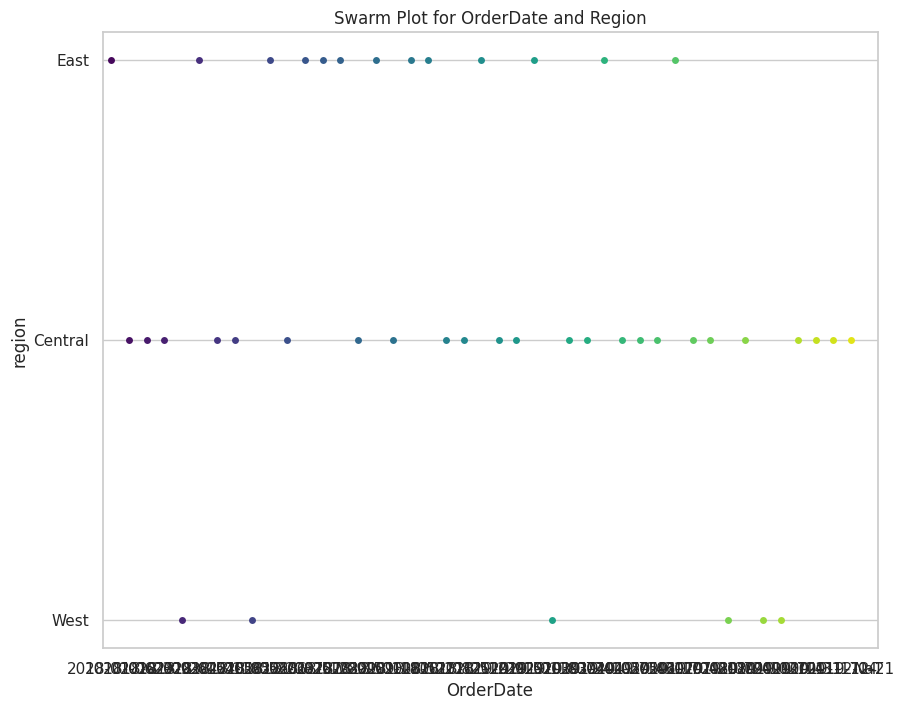

In [37]:
#Sparm Plot-  is a type of categorical scatter plot used to visualize the distribution of data points in a datase

plt.figure(figsize=(10, 8))

# Using Seaborn to create a swarm plot
sns.swarmplot(x="OrderDate", y="Region", data=df, palette='viridis')

plt.title('Swarm Plot for OrderDate and Region')
plt.xlabel('OrderDate')
plt.ylabel('region')
plt.show()